In [1]:
import pandas as pd
import re
import numpy as np


In [2]:
data_search = pd.DataFrame(pd.read_csv('attacks.csv', sep = ','))
data_search
data_search.dropna(axis = 0, thresh = 20, inplace = True)
data_search.dropna(axis = 1, thresh = 20, inplace = True)
data_search

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,ND.0038,1941-1942,0.0,Unprovoked,IRAQ,Basrah,Shatt-el Arab River near a small boat stand,Swimming,male,M,...,Y,Afternoon,Bull shark,B.W. Coad & L.A.J. Al-Hassan,ND-0038-Shatt-al-Arab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0038,ND.0038,38.0
6266,ND.0037,1940 - 1950,0.0,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a pearl diver,M,...,Y,NaN,"""a black-tipped shark""",G.F. Mead,ND-0037-PearlDiver-sepsis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0037,ND.0037,37.0
6267,ND.0036,1940 - 1950,0.0,Unprovoked,SAUDI ARABIA,Eastern Province,East of the Ras Tanura-Jubail area,Diving,a fisherman / diver,M,...,N,NaN,6' shark,G.F. Mead,ND-0036-Fisherman-SaudiArabia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0036,ND.0036,36.0
6296,ND.0006,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,...,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0


In [3]:
data_search['Fatal (Y/N)'].unique()

array(['N', 'Y', nan, 'M', '2017', 'UNKNOWN', ' N'], dtype=object)

In [4]:
data_search['Fatal (Y/N)'].replace({'M':'UNKNOWN', '2017': 'UNKOWN', ' N':'N', 'nan' :'UNKOWN'})
    
        


0       N
1       N
2       N
3       N
4       N
       ..
6265    Y
6266    Y
6267    N
6296    Y
6301    Y
Name: Fatal (Y/N), Length: 4140, dtype: object

In [5]:
data_search['Year'].unique()


array([2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010.,
       2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001.,
       2000., 1999., 1998., 1997., 1996., 1995., 1984., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1983.,
       1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974.,
       1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965.,
       1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956.,
       1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947.,
       1946., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920.,
       1919., 1918., 1917., 1916., 1915., 1914., 1913., 1912., 1911.,
       1910., 1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902.,
       1901., 1900., 1899., 1898., 1897., 1896., 1895., 1894., 1893.,
       1892., 1891.,

In [6]:
data_search_aj = data_search.loc[data_search['Year'] > 1900]

In [7]:
data_search_aj

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5542,1901.12.01,01-Dec-1901,1901.0,Unprovoked,AUSTRALIA,Queensland,Brisbane,Bathing,William Quince,M,...,N,NaN,NaN,"The Argus, 12/2/1901",1901.12.01-Quince.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.12.01,1901.12.01,761.0
5544,1901.09.23.R,Reported 23-Sep-1901,1901.0,Unprovoked,CYPRUS,Southern Cyprus,Larnaca,Swimming,male,M,...,Y,NaN,2 m shark,"Bardanis citing Embros, 9/23/1901",1901.09.23.R-Cyprus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.09.23.R,1901.09.23.R,759.0
5545,1901.07.30,30-Jul-1901,1901.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Windmill Beach,Swimming,"John Hendrick Adrian Chandler, a prisoner of war",M,...,Y,14h15,White shark,"M. Levine, GSAF",1901.07.30-Chandler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.07.30,1901.07.30,758.0
5546,1901.07.17,17-Jul-1901,1901.0,Invalid,ITALY,Syracuse,Capo Santa Croce,Swimming,Antonio Tornatori,M,...,NaN,NaN,Questionable,C. Moore. GSAF,1901.07.17-Antonio.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1901.07.17,1901.07.17,757.0


In [14]:
 data_search_aj['Fatal (Y/N)'].describe()

count     3748
unique       6
top          N
freq      3140
Name: Fatal (Y/N), dtype: object

In [9]:
fatal_yes = data_search.loc[data_search['Fatal (Y/N)'] == 'Y']

In [13]:
fatal_yes['Fatal (Y/N)'].count()


677

In [61]:
data_search_aj.Area.value_counts().head(15)


Florida                  893
New South Wales          332
California               253
Queensland               209
Hawaii                   203
KwaZulu-Natal            155
Western Cape Province    138
Eastern Cape Province    133
Western Australia        132
South Carolina           111
North Carolina            72
South Australia           70
Victoria                  58
Texas                     54
Pernambuco                46
Name: Area, dtype: int64

In [63]:
data_search_aj.Country.value_counts().head(8)


USA                 1744
AUSTRALIA            873
SOUTH AFRICA         430
BAHAMAS               73
NEW ZEALAND           69
BRAZIL                65
PAPUA NEW GUINEA      56
MEXICO                47
Name: Country, dtype: int64

In [67]:
data_saj = data_search_aj.groupby(['Area','Year']).size().reset_index(name='count')
data_saj

,Area,Year,count
0,Kikori River mouth,1959.0,1
1,La Libertad,1950.0,1
2,Lau Province,1963.0,1
3,Loyalty Islands,2011.0,1
4,Primorje-Gorski Kotar County,1955.0,1
...,...,...,...
1747,Ysabel Island,1963.0,1
1748,Zadar County,1914.0,1
1749,Zadar County,1970.0,1
1750,d��tang-Sal�,2013.0,1


In [79]:
data_saj.sort_values(by =['count', 'Area'], ascending = False).head(40)

,Area,Year,count
420,Florida,2003.0,44
418,Florida,2001.0,36
424,Florida,2007.0,36
425,Florida,2008.0,36
417,Florida,2000.0,33
432,Florida,2015.0,32
433,Florida,2016.0,32
419,Florida,2002.0,31
434,Florida,2017.0,31
431,Florida,2014.0,30


In [88]:
data_saj2 = data_saj.loc[data_saj['count'] > 3]
data_saj2

,Area,Year,count
100,Basrah,1970.0,4
116,Binh Dinh Province,2010.0,4
144,California,1955.0,5
148,California,1959.0,9
149,California,1960.0,4
...,...,...,...
1718,Western Cape Province,1998.0,6
1723,Western Cape Province,2004.0,4
1724,Western Cape Province,2005.0,4
1725,Western Cape Province,2006.0,6


In [90]:
data_saj2.sort_values(by = ['Year', 'count'], ascending = False).head(20)

,Area,Year,count
1675,Western Australia,2018.0,9
911,New South Wales,2018.0,6
434,Florida,2017.0,31
1366,South Carolina,2017.0,10
202,California,2017.0,9
910,New South Wales,2017.0,6
1177,Queensland,2017.0,6
576,Hawaii,2017.0,5
1674,Western Australia,2017.0,5
1736,Western Cape Province,2017.0,4


In [108]:
data_florida = data_saj.loc[data_saj['Area'] == 'Florida']

In [111]:
data_florida.sort_values(by = ['Year'], ascending = True).tail(40)

,Area,Year,count
396,Florida,1978.0,4
397,Florida,1979.0,6
398,Florida,1981.0,20
399,Florida,1982.0,9
400,Florida,1983.0,15
401,Florida,1984.0,10
402,Florida,1985.0,8
403,Florida,1986.0,7
404,Florida,1987.0,6
405,Florida,1988.0,16


In [112]:
data_florida.describe()

,Year,count
count,81.000000,81.000000
mean,1973.938272,11.024691
std,29.503112,11.219375
min,1909.000000,1.000000
25%,1957.000000,2.000000
50%,1977.000000,7.000000
75%,1998.000000,17.000000
max,2018.000000,44.000000


In [113]:
from matplotlib import pyplot as plt

In [117]:
a = data_florida.pivot(index= 'Year', columns= 'count', values='count')

<AxesSubplot:xlabel='Year'>

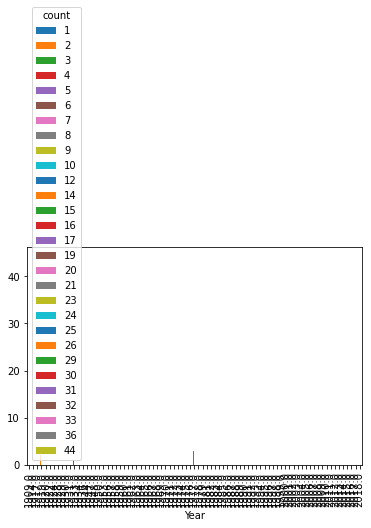

In [118]:
a.plot(kind = 'bar')
